In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("systematic.csv").rename(columns={"Unnamed: 0": "x"})

In [14]:
df

,x,1,2,3,10
0,0.1,0.069385,0.007503,0.109968,0.102921
1,0.2,0.137263,0.145304,0.144611,0.215411
2,0.3,0.272132,0.287739,0.238077,0.263412
3,0.4,0.336067,0.402689,0.385741,0.376611
4,0.5,0.349693,0.432623,0.472933,0.490004
5,0.6,0.568015,0.536553,0.614199,0.607426
6,0.7,0.705654,0.686828,0.772995,0.743008
7,0.8,0.790846,0.783047,0.852890,0.820956
8,0.9,0.995908,0.908454,0.946213,0.894457


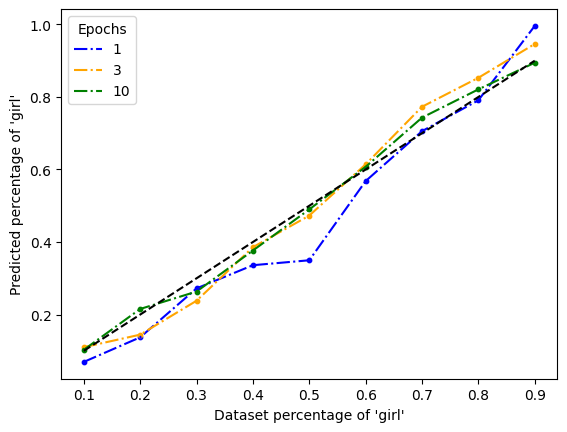

In [30]:
plt.scatter(df["x"], df["1"], color="blue", s=10)
plt.plot(df["x"], df["1"], "-.", color="blue", label="1")
plt.scatter(df["x"], df["3"], color="orange", s=10)
plt.plot(df["x"], df["3"], "-.", color="orange", label="3")
plt.scatter(df["x"], df["10"], color="green", s=10)
plt.plot(df["x"], df["10"], "-.", color="green", label="10")
plt.plot(df["x"], df["x"], "--", color="black")
plt.xlabel("Dataset percentage of 'girl'")
plt.ylabel("Predicted percentage of 'girl'")
plt.legend(title="Epochs")